## <center> Artist Recommendation using Collaborative Filtering
By: Pranay Singla

### Purpose

The aim of this project is to give users new artist recommendations based on their listening preferences and  the preferences of similar LastFM users using collaborative filtering. 

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
pd.options.mode.chained_assignment = None

#### Data Cleaning and Wrangling

In [2]:
# reading lastfm data
df1 = pd.read_csv('usersha1-artmbid-artname-plays.tsv', sep = '\t', names = ['user','artist_id','artist','plays'])

In [3]:
df1.head()

,user,artist_id,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [4]:
# reading user profile data
user_profile = pd.read_csv('usersha1-profile.tsv', sep = '\t', names = ['user','gender','age','country','signup'])

In [5]:
user_profile.head()

,user,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [6]:
# filtering for users only in India or US
user_ind_us = user_profile[user_profile['country'].isin(['United States','India'])]

In [7]:
full_data = pd.merge(df1, user_ind_us, how='inner',on = 'user')

In [8]:
# removing unknown artists
unknown_artist = ['unknown','[unknown]']

In [9]:
full_data = full_data[~full_data['artist'].isin(unknown_artist)]

In [10]:
full_data.head()

,user,artist_id,artist,plays,gender,age,country,signup
0,00007a47085b9aab8af55f52ec8846ac479ac4fe,0110e63e-0a9b-4818-af8e-41e180c20b9a,devendra banhart,456,m,28.0,United States,"Jan 27, 2006"
1,00007a47085b9aab8af55f52ec8846ac479ac4fe,69158f97-4c07-4c4e-baf8-4e4ab1ed666e,boards of canada,407,m,28.0,United States,"Jan 27, 2006"
2,00007a47085b9aab8af55f52ec8846ac479ac4fe,e162b2eb-6a42-4240-8c1b-c94d9a0acb73,cocorosie,386,m,28.0,United States,"Jan 27, 2006"
3,00007a47085b9aab8af55f52ec8846ac479ac4fe,f22942a1-6f70-4f48-866e-238cb2308fbd,aphex twin,213,m,28.0,United States,"Jan 27, 2006"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,0c751690-c784-4a4f-b1e4-c1de27d47581,animal collective,203,m,28.0,United States,"Jan 27, 2006"


In [11]:
edit_df = full_data[['user','artist','plays']]

In [12]:
# removing na
edit_df.dropna(inplace=True)

In [13]:
edit_df['artist'] = edit_df['artist'].str.lower()

In [14]:
# number of unique artists
edit_df.artist.nunique()

115409

In [15]:
# reading Pranay's lastfm data
pranay = pd.read_csv('Pranay_Singla2.csv', names=['artist','album','track','time'])

In [16]:
pranay = pranay[['artist','track']]

In [17]:
pranay_df = pranay.groupby(['artist','track'], as_index=False).size()

In [18]:
pranay_df['artist'] = pranay_df['artist'].str.lower()

In [19]:
my_artists = list(set(list(pranay_df['artist'])))

In [20]:
# number of artists in Pranay's data
len(my_artists)

224

In [21]:
all_artists = list(set(list(edit_df['artist'])))

In [22]:
remove_artist = []
for abc in my_artists:
    if abc not in all_artists:
        remove_artist.append(abc)

In [23]:
my_artist_new = [l for l in my_artists if l not in remove_artist]

In [24]:
# selecting only top 500 artists for further analysis
top_1000 = edit_df.groupby('artist', as_index=False)['plays'].sum()

In [25]:
top_1000 = top_1000.sort_values('plays', ascending=False)

In [26]:
top_1000 = top_1000.iloc[:1000,:].reset_index(drop = True)

In [27]:
top_1000_artists = list(top_1000['artist'])

In [28]:
top_500_artists = top_1000_artists[:500]

In [29]:
# final list of artists
final_artists = list(set(top_500_artists + my_artist_new))

In [30]:
pranay_final = pranay_df[pranay_df['artist'].isin(final_artists)]

In [31]:
pranay_final = pranay_final.groupby('artist',as_index=False).sum('size')

In [32]:
pranay_final['user'] = 'Pranay_Singla'

In [33]:
pranay_final = pranay_final[['user','artist','size']]

In [34]:
pranay_final.columns = ['user','artist','plays']

In [35]:
pranay_final.head()

,user,artist,plays
0,Pranay_Singla,*nsync,2
1,Pranay_Singla,a.r. rahman,1
2,Pranay_Singla,abba,2
3,Pranay_Singla,ac/dc,8
4,Pranay_Singla,adele,2


In [36]:
edit_2 = edit_df[edit_df['artist'].isin(final_artists)]

In [37]:
# combining the 2 datasets
combined_df = pd.concat([edit_2, pranay_final])

In [38]:
combined_df = combined_df.reset_index(drop = True)

In [39]:
combined_df

,user,artist,plays
0,00007a47085b9aab8af55f52ec8846ac479ac4fe,devendra banhart,456
1,00007a47085b9aab8af55f52ec8846ac479ac4fe,boards of canada,407
2,00007a47085b9aab8af55f52ec8846ac479ac4fe,cocorosie,386
3,00007a47085b9aab8af55f52ec8846ac479ac4fe,aphex twin,213
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,animal collective,203
...,...,...,...
1397492,Pranay_Singla,the who,13
1397493,Pranay_Singla,tiësto,2
1397494,Pranay_Singla,tom petty and the heartbreakers,2
1397495,Pranay_Singla,vengaboys,2


In [40]:
# creating pivot table for analysis
lastfm = combined_df.pivot_table('plays','user','artist')

In [41]:
# replacing na's by 0
lastfm.fillna(0, inplace=True)

In [42]:
lastfm.head()

artist,*nsync,2pac,3 doors down,30 seconds to mars,311,50 cent,a day to remember,a perfect circle,a tribe called quest,a.r. rahman,...,why?,wilco,wu-tang clan,yann tiersen,yeah yeah yeahs,yo la tengo,zz top,植松伸夫,菅野よう子,동방신기
user,,,,,,,,,,,,,,,,,,,,,
00007a47085b9aab8af55f52ec8846ac479ac4fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001a57568309b287363e72dc682e9a170ba6dc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00024b5b85c40f990c28644d53257819980bf6bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002dd2154072434d26e5409faa591bfb260a01e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00032c7933e0eb05f2258f1147ef81a90f2d4d6c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# replacing values > 0 by 1 to replace number of plays by simple artist-user mapping
lastfm_df = lastfm.apply(lambda x:[1 if y > 0 else y for y in x])

In [44]:
lastfm_df['my_artists_sum'] = lastfm_df[my_artist_new].sum(axis = 1)

In [45]:
# subset dataset for recommendation considering only those users who have atleast 4 common artist preferences
lastfm_subset = lastfm_df[lastfm_df['my_artists_sum'] > 4]

In [46]:
lastfm_subset.drop(['my_artists_sum'], inplace=True, axis = 1)

In [47]:
lastfm_df.drop(['my_artists_sum'], inplace = True, axis = 1)

In [48]:
lastfm_subset.to_csv('lastfm1.csv')

In [49]:
lastfm_df.to_csv('lastfm.csv')

## Collaborative Filtering

In [50]:
# Reading Saved File
lastfm_subset = pd.read_csv('lastfm1.csv')

In [51]:
data_items = lastfm_subset.drop('user', 1)

In [52]:
# calculating magnitude and dividing by the data to make sure each user has equal contribution
magnitude = np.sqrt(np.square(data_items).sum(axis=1))

In [53]:
data_items = data_items.divide(magnitude, axis='index')

In [54]:
# calculating similarity (cosine) for collaborative filtering
def calculate_similarity(data_items):
    data_sparse = sparse.csr_matrix(data_items)
    similarities = cosine_similarity(data_sparse.transpose())
    sim = pd.DataFrame(data=similarities, index= data_items.columns, columns= data_items.columns)
    return sim

In [55]:
# Build the similarity matrix
data_matrix = calculate_similarity(data_items)

##### top 10 similar artists for queen based on user listening preferences

In [56]:
vizdf = pd.DataFrame(data_matrix.loc['queen'].nlargest(11)[1:])
vizdf.columns = ['cosine_similarity']

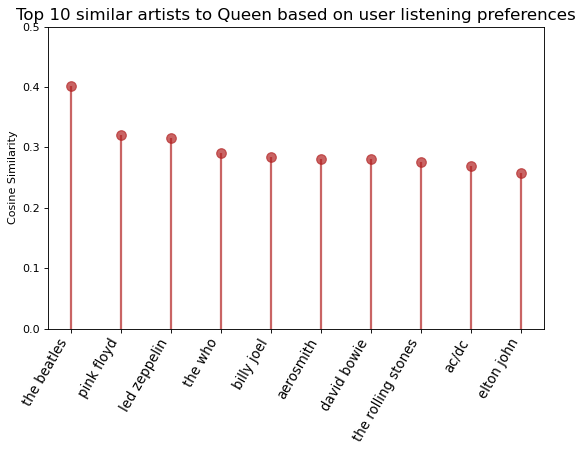

In [57]:
# Draw plot
fig, ax = plt.subplots(figsize=(8,5), dpi= 80)
ax.vlines(x=vizdf.index, ymin=0, ymax=vizdf.cosine_similarity, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=vizdf.index, y=vizdf.cosine_similarity, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 10 similar artists to Queen based on user listening preferences', fontdict={'size':15})
ax.set_ylabel('Cosine Similarity')
ax.set_xticks(vizdf.index)
ax.set_xticklabels(vizdf.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, .5)

# Annotate
# for row in vizdf.itertuples():
#     ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

##### top 10 similar artists for rihanna based on user listening preferences

In [58]:
vizdf = pd.DataFrame(data_matrix.loc['rihanna'].nlargest(11)[1:])
vizdf.columns = ['cosine_similarity']

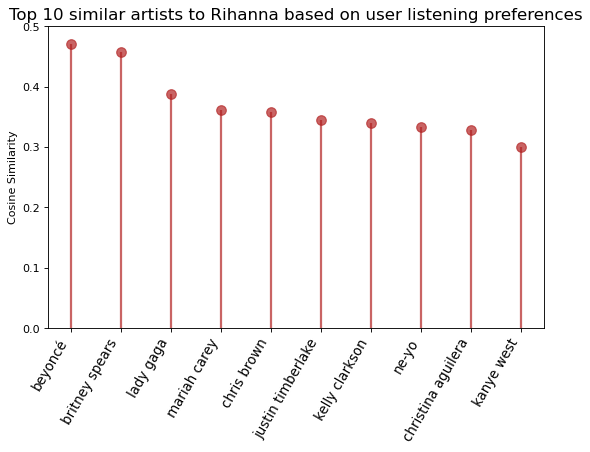

In [59]:
# Draw plot
fig, ax = plt.subplots(figsize=(8,5), dpi= 80)
ax.vlines(x=vizdf.index, ymin=0, ymax=vizdf.cosine_similarity, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=vizdf.index, y=vizdf.cosine_similarity, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 10 similar artists to Rihanna based on user listening preferences', fontdict={'size':15})
ax.set_ylabel('Cosine Similarity')
ax.set_xticks(vizdf.index)
ax.set_xticklabels(vizdf.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, .5)

# Annotate
# for row in vizdf.itertuples():
#     ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

##### top 10 similar artists for eminem based on user listening preferences

In [60]:
vizdf = pd.DataFrame(data_matrix.loc['eminem'].nlargest(11)[1:])
vizdf.columns = ['cosine_similarity']

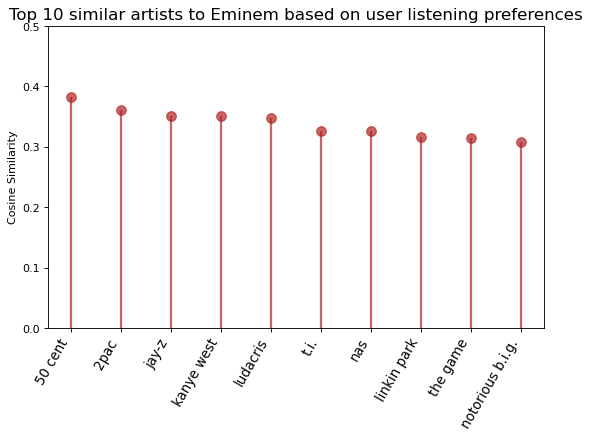

In [61]:
# Draw plot
fig, ax = plt.subplots(figsize=(8,5), dpi= 80)
ax.vlines(x=vizdf.index, ymin=0, ymax=vizdf.cosine_similarity, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=vizdf.index, y=vizdf.cosine_similarity, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 10 similar artists to Eminem based on user listening preferences', fontdict={'size':15})
ax.set_ylabel('Cosine Similarity')
ax.set_xticks(vizdf.index)
ax.set_xticklabels(vizdf.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, .5)

# Annotate
# for row in vizdf.itertuples():
#     ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

##### top 10 similar artists for deadmau5 based on user listening preferences

In [62]:
vizdf = pd.DataFrame(data_matrix.loc['deadmau5'].nlargest(11)[1:])
vizdf.columns = ['cosine_similarity']

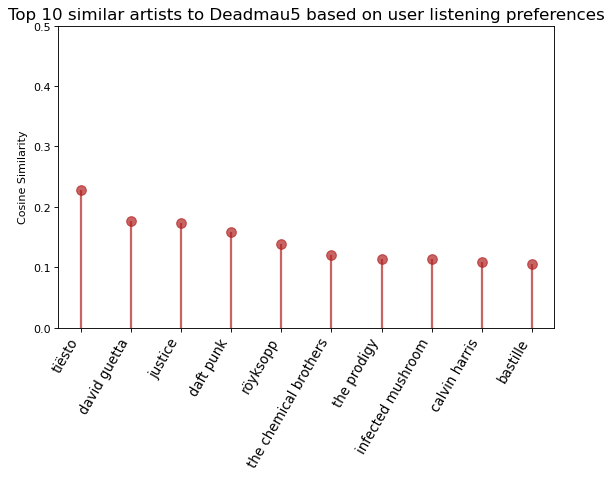

In [63]:
# Draw plot
fig, ax = plt.subplots(figsize=(8,5), dpi= 80)
ax.vlines(x=vizdf.index, ymin=0, ymax=vizdf.cosine_similarity, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=vizdf.index, y=vizdf.cosine_similarity, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 10 similar artists to Deadmau5 based on user listening preferences', fontdict={'size':15})
ax.set_ylabel('Cosine Similarity')
ax.set_xticks(vizdf.index)
ax.set_xticklabels(vizdf.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, .5)

# Annotate
# for row in vizdf.itertuples():
#     ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

##### top 10 similar artists for a.r. rahman based on user listening preferences

In [64]:
vizdf = pd.DataFrame(data_matrix.loc['a.r. rahman'].nlargest(11)[1:])
vizdf.columns = ['cosine_similarity']

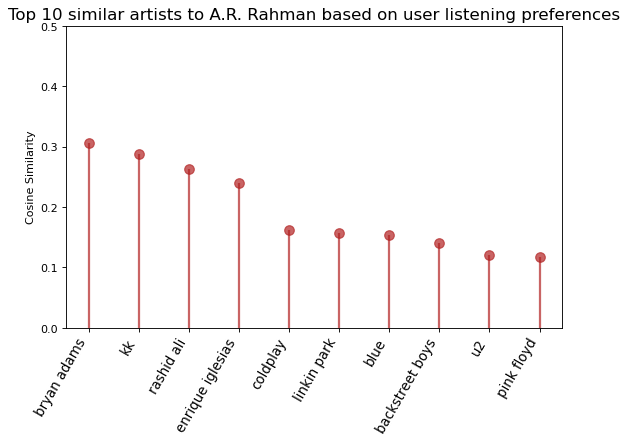

In [65]:
# Draw plot
fig, ax = plt.subplots(figsize=(8,5), dpi= 80)
ax.vlines(x=vizdf.index, ymin=0, ymax=vizdf.cosine_similarity, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=vizdf.index, y=vizdf.cosine_similarity, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 10 similar artists to A.R. Rahman based on user listening preferences', fontdict={'size':15})
ax.set_ylabel('Cosine Similarity')
ax.set_xticks(vizdf.index)
ax.set_xticklabels(vizdf.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, .5)

# Annotate
# for row in vizdf.itertuples():
#     ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

#### User Item Calculations

In [66]:
# Constructing a new dataframe with the 10 closest neighbours (most similar) for each artist.
data_neighbours = pd.DataFrame(index=data_matrix.columns, columns=range(1,11))
for i in range(0, len(data_matrix.columns)):
    data_neighbours.iloc[i,:10] = data_matrix.iloc[0:,i].sort_values(ascending=False)[:10].index

In [67]:
# Building artist recommendation for Pranay
user = 'Pranay_Singla'
user_index = lastfm_subset[lastfm_subset.user == user].index.tolist()[0]

In [68]:
# Getting the artists the user has played.
known_user_likes = data_items.iloc[user_index]
known_user_likes = known_user_likes[known_user_likes >0].index.values

In [69]:
# Constructing the neighbourhood from the most similar items to the ones our user has already liked.
most_similar_to_likes = data_neighbours.loc[known_user_likes]
similar_list = most_similar_to_likes.values.tolist()
similar_list = list(set([item for sublist in similar_list for item in sublist]))
neighbourhood = data_matrix[similar_list].loc[similar_list]

In [70]:
# A user vector containing only the neighbourhood items and the known user likes.
user_vector = data_items.iloc[user_index].loc[similar_list]

In [71]:
# Calculating the score.
score = neighbourhood.dot(user_vector).div(neighbourhood.sum(axis=1))
# Dropping known likes.
score = score.drop(known_user_likes)

In [72]:
print('Top recommendations for Pranay')
print()
print(score.nlargest(15))

Top recommendations for Pranay

electric light orchestra    0.040966
jethro tull                 0.039964
eric clapton                0.039452
billy joel                  0.039441
van halen                   0.039383
elvis presley               0.038365
genesis                     0.038293
rush                        0.038089
3 doors down                0.037800
enya                        0.037751
the rolling stones          0.037433
black sabbath               0.037340
the doors                   0.037246
bruce springsteen           0.037127
steely dan                  0.037093
dtype: float64


In [73]:
vizdf = pd.DataFrame(score.nlargest(10))
vizdf.columns = ['similarity_score']

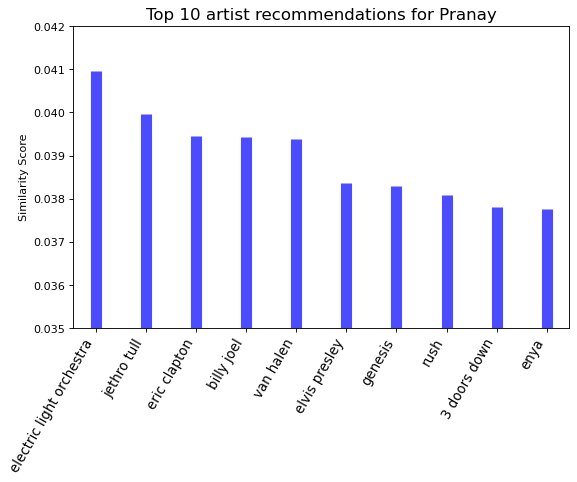

In [74]:
# Draw plot
fig, ax = plt.subplots(figsize=(8,5), facecolor = 'white',dpi= 80)
ax.vlines(x=vizdf.index, ymin=0, ymax=vizdf.similarity_score, color='blue', alpha=0.7, linewidth=10)

# Title, Label, Ticks and Ylim
ax.set_title('Top 10 artist recommendations for Pranay', fontdict={'size':15})
ax.set(ylabel = 'Similarity Score', ylim = (0.035, 0.042))
ax.set_xticks(vizdf.index)
ax.set_xticklabels(vizdf.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})

# Annotate
# for row in vizdf.itertuples():
#     ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

In [75]:
data_neighbours.to_csv('similar_artist.csv')